In [18]:
import gym
import numpy as np

from stable_baselines3 import PPO
from stable_baselines3.common.env_util import make_vec_env

import torch
from torch import nn
from torch.utils.data import TensorDataset, DataLoader

import matplotlib.pyplot as plt

from mlp import *
from feedback_env import *
from learning import *

In [19]:
# Setup configs for reward and policy learning

reward_cfg = {
    'n_sample': 100,
    'n_epoch': 10,
    'lr': 0.9,
    'verbose': False,
    'print_freq': 500,
    'batch_size': 64
}

policy_cfg = {
    'timesteps': 100,
    'verbose': True,
    'algo': 'ppo' # not used atm
}

In [20]:
## Feedback loop

iterations = 10
samples = {}

# Create comparison function
f = lambda x: 0
g = lambda x: 0
comparison_fn = create_comparison_fn(f, g, sigma_f=0, sigma_g=0)

# Initialize random sampler
sample = lambda n: (None, [np.random.uniform(-10, 10, size=(2,)) for _ in range(n)])

for i in range(iterations):
    print("Iteration", i)
    # Learn reward function from samples and feedback from comparison function
    reward_fn = learn_reward(sample, comparison_fn, reward_cfg=reward_cfg)
    
    # Train policy on reward function and return sampler
    sample = train_policy(reward_fn, policy_cfg=policy_cfg)

    # Store samplers
    samples[i] = sample

Iteration 0
Learning with PPO
Using cpu device
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1        |
|    ep_rew_mean     | -0.0226  |
| time/              |          |
|    fps             | 2053     |
|    iterations      | 1        |
|    time_elapsed    | 0        |
|    total_timesteps | 2048     |
---------------------------------
Iteration 1


/Users/anandsranjan/miniconda3/envs/games_env/lib/python3.9/site-packages/gym/envs/registration.py:216: UserWarning: WARN: Overriding environment FeedbackEnv-v0
  logger.warn("Overriding environment {}".format(id))


Learning with PPO
Using cpu device
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1        |
|    ep_rew_mean     | -0.389   |
| time/              |          |
|    fps             | 2085     |
|    iterations      | 1        |
|    time_elapsed    | 0        |
|    total_timesteps | 2048     |
---------------------------------
Iteration 2
Learning with PPO
Using cpu device
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1        |
|    ep_rew_mean     | 0.314    |
| time/              |          |
|    fps             | 1901     |
|    iterations      | 1        |
|    time_elapsed    | 1        |
|    total_timesteps | 2048     |
---------------------------------
Iteration 3
Learning with PPO
Using cpu device
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1        |
|    ep_rew_mean     | 0.283    |
| time/              |          |
|    fps             

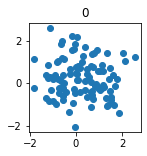

[0.23023194 0.25022706] [0.959378  0.9030671]


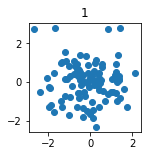

[-0.14548367  0.01673774] [1.0215809 1.0092015]


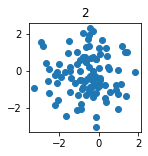

[-0.55857384 -0.18438219] [1.0363413 1.1094296]


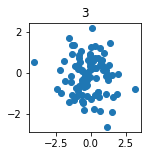

[-0.16781196 -0.13035488] [1.07466  0.894353]


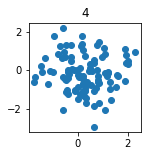

[ 0.27000493 -0.17038864] [0.8662465  0.95087135]


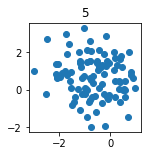

[-0.64221597  0.6905665 ] [0.8557906 1.071686 ]


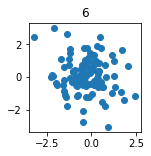

[-0.2639434   0.15158679] [1.0146356 1.1075388]


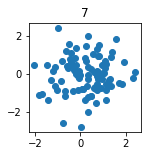

[ 0.25134015 -0.05541502] [0.90244   0.9236739]


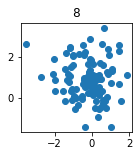

[-0.19452266  0.92122734] [0.9512171 0.9741894]


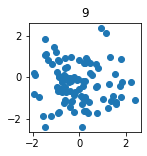

[-0.08242761 -0.3196575 ] [0.9768006 0.9657554]


In [21]:
for i in range(iterations):
    plot_sampler(samples[i], title=str(i))